# Bike sharing (Linear Regression) - OTM 714 2022

## Load the datasets

In [1]:
df = read.csv('../input/new-corrected-bike-sharing-otm-714-2022/bike sharing training for students.csv')
for_predict = read.csv('../input/new-corrected-bike-sharing-otm-714-2022/bike sharing test for students.csv')
to_submit = read.csv('../input/new-corrected-bike-sharing-otm-714-2022/bike sharing sample submission.csv')

## Prepare the data for the training
- Change the data tyoe of season and weather to character (Set them as category)
- Add new features
  - year (set as category)
  - month (set as category)
  - hour (set as category)

### Chage the data type of season and weather to characeter (They are categories)

In [2]:
df$season = as.character(df$season)
df$weather = as.character(df$weather)
for_predict$season = as.character(for_predict$season)
for_predict$weather = as.character(for_predict$weather)
df$workingday = as.character(df$workingday)
for_predict$workingday = as.character(for_predict$workingday)

In [3]:
#head(df)

### Add new features
#### doing this in order to get more information, we can not get a good model from original given information

#### - year (set as category)
#### - month (set as category)
#### - hour (set as category)

In [4]:
# load the package for dealing with date data
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [5]:
#separate out hours
time <- as.POSIXlt(df$datetime, format = "%m/%d/%Y %H:%M")
#df$datetime <- format(time, format = "%m/%d/%Y")
df$month <- format(time, format = "%m")
df$year <- format(time, format = "%Y")
df$hour <- format(time, format = "%H")

time2 <- as.POSIXlt(for_predict$datetime, format = "%m/%d/%Y %H:%M")
#for_predict$datetime <- format(time2, format = "%m/%d/%Y")
for_predict$month <- format(time2, format = "%m")
for_predict$year <- format(time2, format = "%Y")
for_predict$hour <- format(time2, format = "%H")

In [6]:
# set them as category
df$hour = as.character(df$hour)
for_predict$hour = as.character(for_predict$hour)
df$month = as.character(df$month)
for_predict$month = as.character(for_predict$month)
df$year = as.character(df$year)
for_predict$year = as.character(for_predict$year)

In [7]:
#separate out name of weekday
df$weekday <- wday(time)
for_predict$weekday <- wday(time2)
df$weekday = as.character(df$weekday)
for_predict$weekday = as.character(for_predict$weekday)

#### - set humidity as category
#### - set windspeed as category

In [8]:
# set category for humidity
df$humidity[which(df$humidity <= 30)] <- 1000
df$humidity[which(df$humidity <= 55)] <- 2000
df$humidity[which(df$humidity <= 79)] <- 3000
df$humidity[which(df$humidity <= 100)] <- 4000

for_predict$humidity[which(for_predict$humidity <= 30)] <- 1000
for_predict$humidity[which(for_predict$humidity <= 55)] <- 2000
for_predict$humidity[which(for_predict$humidity <= 79)] <- 3000
for_predict$humidity[which(for_predict$humidity <= 100)] <- 4000

In [9]:
# set category for windspeed
df$windspeed[which(df$windspeed <= 10)] <- 1000
df$windspeed[which(df$windspeed <= 35.5)] <- 2000
df$windspeed[which(df$windspeed <= 200)] <- 3000

for_predict$windspeed[which(for_predict$windspeed <= 10)] <- 1000
for_predict$windspeed[which(for_predict$windspeed <= 35.5)] <- 2000
for_predict$windspeed[which(for_predict$windspeed <= 200)] <- 3000

#### - set tempreture data as category according to atemp

In [10]:
df$humidity = as.character(df$humidity)
for_predict$humidity = as.character(for_predict$humidity)
df$windspeed = as.character(df$windspeed)
for_predict$windspeed = as.character(for_predict$windspeed)

In [11]:
df$tempclass <- df$atemp
for_predict$tempclass <- for_predict$atemp

In [12]:
# set category for tempreture
df$tempclass[which(df$tempclass <= 14)] <- 1000
df$tempclass[which(df$tempclass <= 24)] <- 2000
df$tempclass[which(df$tempclass <= 30)] <- 3000
df$tempclass[which(df$tempclass <= 100)] <- 4000


for_predict$tempclass[which(for_predict$tempclass <= 14)] <- 1000
for_predict$tempclass[which(for_predict$tempclass <= 24)] <- 2000
for_predict$tempclass[which(for_predict$tempclass <= 30)] <- 3000
for_predict$tempclass[which(for_predict$tempclass <= 100)] <- 4000

In [13]:
df$tempclass = as.character(df$tempclass)
for_predict$tempclass = as.character(for_predict$tempclass)

In [14]:
# check the data
head(df)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,hour,weekday,tempclass
,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1/1/2011 0:00,1,0,0,1,9.84,14.395,4000,1000,3,13,16,01,2011,00,7,2000
2,1/1/2011 1:00,1,0,0,1,9.02,13.635,4000,1000,8,32,40,01,2011,01,7,1000
3,1/1/2011 2:00,1,0,0,1,9.02,13.635,4000,1000,5,27,32,01,2011,02,7,1000
4,1/1/2011 3:00,1,0,0,1,9.84,14.395,3000,1000,3,10,13,01,2011,03,7,2000
5,1/1/2011 4:00,1,0,0,1,9.84,14.395,3000,1000,0,1,1,01,2011,04,7,2000
6,1/1/2011 5:00,1,0,0,2,9.84,12.880,3000,1000,0,1,1,01,2011,05,7,1000


In [15]:
#write.table(df,"./feature.csv", row.names = FALSE, sep = ',')

## Split training and test set 
#### (Do this because we have limited change to submit, so test the result first here)

I try to set seed here and change the seed 5 times of every model to get the average of the RMSE here to simulate cross validiction.

**And we have a finding that when we split the data to training and test set by 6:4. The outcome(averge of 5 RMSE from test set)  are always close to the score on the public rank! That make us believe that the data in we are goinf to predict is similar as the training data.**

In [16]:
# set different seed here 5 times to test one single model
set.seed(39)

In [17]:
train_range <- sample.int(n = nrow(df), size = floor(.6*nrow(df)), replace = FALSE)
df1 <- df[train_range, ]
df2 <- df[-train_range, ]

## Train the Casual and Registered data 
#### We first two build model for 'casual' and 'registered' and use backward selection to see which variables we need to remove

In [18]:
# load the package for backward selection
library(olsrr)


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers




But time for running backward selection is too long when we are getting to many variables. So we stop doing this when it takes too long time to run.

In [19]:
# create the model for casual users
#fit_casual <- lm(casual ~ hour*workingday + hour + workingday + month*year + month + year + weekday + holiday + season + weather + temp + atemp + humidity + windspeed, data=df1)

In [20]:
#ols_step_backward_p(fit_casual)

In [21]:
# create the model for registered users
#fit_registered <- lm(registered ~ hour*workingday + hour + workingday + month*year + month + year + weekday + holiday + season + weather + temp + atemp + humidity + windspeed, data=df1)

In [22]:
#ols_step_backward_p(fit_registered)

## Test the preformance of the model

### Define the model after the backward selection and build model on the training set.

We can get more information about count when we do the combine. So we combine the single features to get new features here.

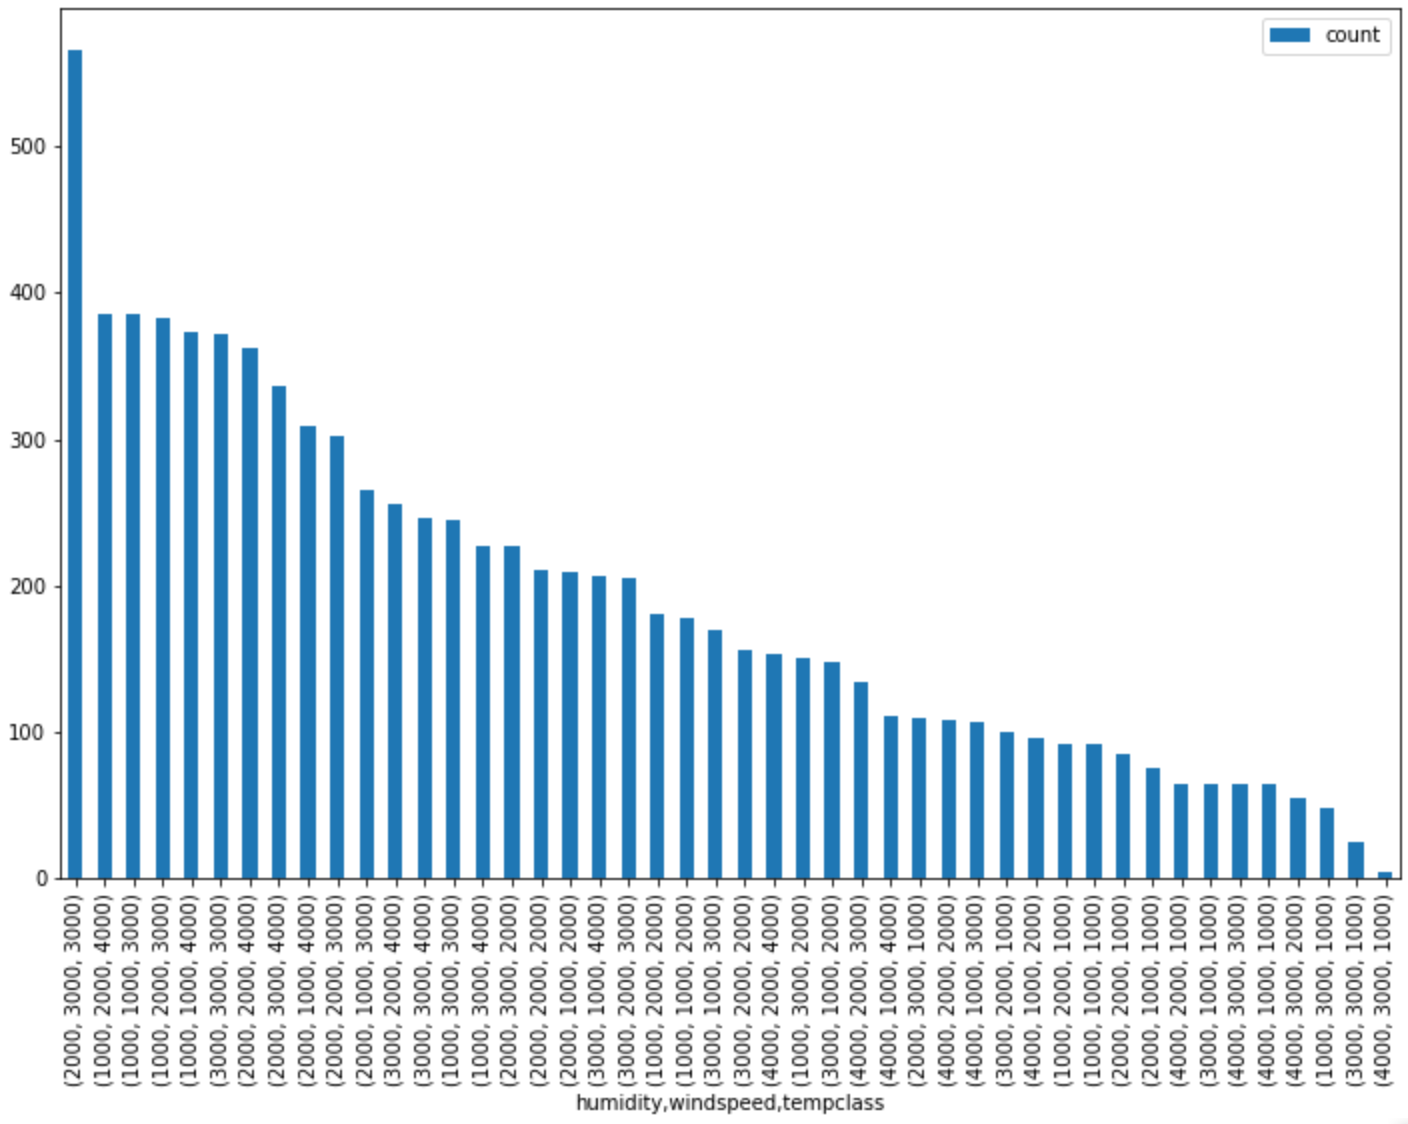

In [23]:
# define the model after selection
fit_casual2 <- lm(casual ~ hour*workingday*month*year + weather + holiday + weekday + season + atemp + humidity*windspeed*tempclass + holiday*weekday, data=df1)

In [24]:
# create the model for registered users
fit_registered2 <- lm(registered ~ hour*workingday*month*year + weather + holiday + weekday + season + atemp + humidity*windspeed*tempclass + holiday*weekday, data=df1)

### Test the performance on the test set (by RMSE)

In [25]:
p1 = predict(fit_casual2, df2)
p1[which(p1 < 0)] <- 0
p2 = predict(fit_registered2, df2)
p2[which(p2 < 0)] <- 0

Warning message in predict.lm(fit_casual2, df2):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(fit_registered2, df2):
“prediction from a rank-deficient fit may be misleading”


In [26]:
a <- p1 + p2

RMSE_out<-sqrt(mean((df2$count-a)^2))
RMSE_out

[1] 55.17877

## Define the final model (on the whole dataset but not the traning set after split)

In [27]:
# define the final model
fit_casual_final <- lm(casual ~ hour*workingday*month*year + weather + holiday + weekday + season + atemp + humidity*windspeed*tempclass + holiday*weekday, data=df)

In [28]:
# create the final model
fit_registered_final <- lm(registered ~ hour*workingday*month*year + weather + holiday + weekday + season + atemp + humidity*windspeed*tempclass + holiday*weekday, data=df)

# Make the prediction and submit the file

In [29]:
# import the dataset for use to fill in the result
to_submit = read.csv('../input/new-corrected-bike-sharing-otm-714-2022/bike sharing sample submission.csv')

In [30]:
prediction1 = predict(fit_casual_final, for_predict)
#replace the prediction low than 0 with 0
prediction1[which(prediction1 < 0)] <- 0
prediction2 = predict(fit_registered_final, for_predict)
#replace the prediction low than 0 with 0
prediction2[which(prediction2 < 0)] <- 0

Warning message in predict.lm(fit_casual_final, for_predict):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(fit_registered_final, for_predict):
“prediction from a rank-deficient fit may be misleading”


In [31]:
# sum up the 2 predictions to get the final prediction
to_submit$count = prediction1 + prediction2

In [32]:
# check the data we need to submit
head(to_submit)

,datetime,count
,<chr>,<dbl>
1,1/14/2011 0:00,9.786185
2,1/14/2011 1:00,6.016491
3,1/14/2011 2:00,5.205518
4,1/14/2011 3:00,6.274910
5,1/14/2011 5:00,11.309892
6,1/14/2011 6:00,37.987898


In [33]:
# write the df to csv file
write.table(to_submit,"./submission.csv", row.names = FALSE, sep = ',')